# Random Forest Classifier: Fit and evaluate a model

In [15]:
import joblib
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score

In [16]:
tr_features=pd.read_csv('train_features.csv')
tr_labels=pd.read_csv('train_labels.csv')

te_features=pd.read_csv('test_features.csv')
te_labels=pd.read_csv('test_labels.csv')

In [17]:
def print_results(results):
    print('Best PARAMS: {}\n'.format(results.best_params_))
    means=results.cv_results_['mean_test_score']
    stds=results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}' .format(round(mean,3), round(std*2,3), params))

### Hyperparameter tuning

In [18]:
rf=RandomForestClassifier()

parameters= {
    'n_estimators': [5, 50, 100, 200],     #how many individual decission tree, defult 10
    'max_depth':[2,14,8,16,32, None]       #how deep is each decission tree, None goes as much as can see the good resultsone
}

cv=GridSearchCV(rf, parameters, cv=5)
cv.fit(tr_features, tr_labels.values.ravel())

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [19]:
print_results(cv)

Best PARAMS: {'max_depth': 8, 'n_estimators': 50}

0.762 (+/-0.149) for {'max_depth': 2, 'n_estimators': 5}
0.807 (+/-0.096) for {'max_depth': 2, 'n_estimators': 50}
0.802 (+/-0.104) for {'max_depth': 2, 'n_estimators': 100}
0.802 (+/-0.102) for {'max_depth': 2, 'n_estimators': 200}
0.783 (+/-0.1) for {'max_depth': 14, 'n_estimators': 5}
0.807 (+/-0.053) for {'max_depth': 14, 'n_estimators': 50}
0.803 (+/-0.04) for {'max_depth': 14, 'n_estimators': 100}
0.813 (+/-0.042) for {'max_depth': 14, 'n_estimators': 200}
0.794 (+/-0.035) for {'max_depth': 8, 'n_estimators': 5}
0.83 (+/-0.059) for {'max_depth': 8, 'n_estimators': 50}
0.828 (+/-0.058) for {'max_depth': 8, 'n_estimators': 100}
0.828 (+/-0.067) for {'max_depth': 8, 'n_estimators': 200}
0.803 (+/-0.023) for {'max_depth': 16, 'n_estimators': 5}
0.802 (+/-0.057) for {'max_depth': 16, 'n_estimators': 50}
0.796 (+/-0.059) for {'max_depth': 16, 'n_estimators': 100}
0.809 (+/-0.041) for {'max_depth': 16, 'n_estimators': 200}
0.798 (+/-0.0

In [20]:
cv.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=8, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [21]:
scores = cross_val_score(rf, tr_features, tr_labels.values.ravel(), cv=5)
scores

array([0.80373832, 0.80373832, 0.77570093, 0.79439252, 0.83962264])

### Write out pickled model

In [22]:
joblib.dump(cv.best_estimator_, 'RF_model.pkl')

['RF_model.pkl']

# Feature Importance

It used only for decision trees and RF

In [23]:
# for loading example
model=joblib.load('RF_model.pkl')

In [24]:
feature_labels = np.array(list(tr_features.columns))

In [25]:
importance=model.feature_importances_

In [26]:
feature_indexes_by_importance=importance.argsort()

In [27]:
for index in feature_indexes_by_importance:
    print("{} - {:2f}%".format(feature_labels[index], (importance[index]*100)))

Q - 1.309417%
S - 3.219711%
Cabin_ind - 4.890104%
Family_cnt - 8.166648%
Pclass - 9.956860%
Age - 17.403825%
Fare - 20.074812%
Sex - 34.978623%


In [28]:
sorted(zip(importance, feature_labels),reverse=True)[0:10]

[(0.3497862298332742, 'Sex'),
 (0.2007481162123869, 'Fare'),
 (0.1740382468253217, 'Age'),
 (0.09956860484706924, 'Pclass'),
 (0.08166648254707169, 'Family_cnt'),
 (0.048901039857146, 'Cabin_ind'),
 (0.03219710525229101, 'S'),
 (0.013094174625439313, 'Q')]

# ROC Curve

A ROC curve is one more important metric, and it’s a most commonly used way to
visualize the performance of a binary classifier, and AUC is believed to be one of the best
ways to summarize performance in a single number. AUC indicates that the probability
of a randomly selected positive example will be scored higher by the classifier than a
randomly selected negative example. If you have multiple models with nearly the same
accuracy, you can pick the one that gives a higher AUC

In [29]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()

AUC: 0.85


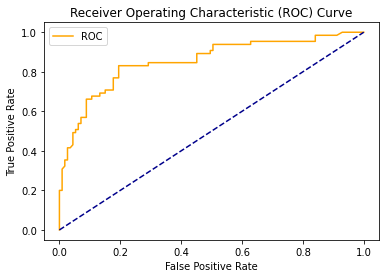

In [30]:
probs = model.predict_proba(te_features)
probs = probs[:, 1]
auc = roc_auc_score(te_labels, probs)
print('AUC: %.2f' % auc)
fpr, tpr, thresholds = roc_curve(te_labels, probs)
plot_roc_curve(fpr, tpr)